# P2P Default Binary Classification | Supervised Learning Project

Hypothesis:

    H0 - Null hypothesis, when the model cannot beat the null accuracy score for "Fully Paid" & "Charged Off" loans
    H1 - Reject the Null hypothesis, when accuracy, precision and recall scores can beat the null accuracy score.

True Positives (TP): Number of correct positive predictions | correctly predicted loan will Charged Off (1)
True Negatives (TN): Number of correct negative predictions | correctly predicted loan will be Fully Paid (0)
False Positives (FP): Number incorrect positive predictions | incorrectly predicted loan will be Charged Off
False Negatives (FN): Number of incorrect negative predictions | incorrectly predicted loan will be Fully Paid

Goals:

I'm planning to select a supervised learning model to see what features attribute to a loan default(binary classification). (TP+TN)/Total Population is the Accuracy (ACC) score bench mark in comparison of each model. 
I have Lending Club's 2015 dataset with 145 loan characteristics, and 400k+ records to begin with.
The dataset is relatively large, and data is very sparse - possibly very redundant features. 

Feature engineering will be a challenge, and we want to know whether or not the user will default or not based on their application information, and not based on Lending Club's collected data once the loan is issued. This is also the reason for an older dataset where we already know if they have successfully paid off their loan or have defaulted under the "loan_status" field. 
I used to work for Lending Club's Investor Group, and would be interested in demystifying the underwriting model, and which types have highest tendencies to default. 

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("/Users/Darrenklee/Desktop/DS-Project/LoanStats3d.csv")
df.shape

(421095, 143)

In [193]:
df.loan_status.value_counts()

Current               196354
Fully Paid            155420
Charged Off            55574
Late (31-120 days)      7647
In Grace Period         4692
Late (16-30 days)       1387
Default                   21
Name: loan_status, dtype: int64

In [194]:
# We will only work with loans that have been "Fully Paid", and those that "Charged Off". 
df = df[df.loan_status != "Current"]
df = df[df.loan_status != "Late (31-120 days)"]
df = df[df.loan_status != "In Grace Period"]
df = df[df.loan_status != "Late (16-30 days)"]
df = df[df.loan_status != "Default"]

In [195]:
df.shape
#almost cuts the dataset in half by responses.

(210994, 143)

In [196]:
#"loan_status" will be the target variable. ~74% null accuracy is what we need to beat with our model
df.loan_status.value_counts(normalize=True)*100

Fully Paid     73.660862
Charged Off    26.339138
Name: loan_status, dtype: float64

In [197]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,210994.000000,210994.000000,210994.000000,210994.000000,2.109940e+05,0.0,210992.000000,210994.000000,210994.000000,109046.000000,...,153.0,153.000000,153.0,153.000000,16.000000,153.000000,153.000000,4583.000000,4583.000000,4583.000000
mean,14949.374508,14949.374508,14943.359854,443.917652,7.662230e+04,NaN,18.876317,0.335246,0.637919,34.801790,...,3.0,126.561961,3.0,18.294118,316.113750,9849.725556,179.584314,5731.476498,49.000343,12.094043
std,8562.173794,8562.173794,8558.678600,250.949787,7.178636e+04,NaN,8.704507,0.921001,0.918971,22.126952,...,0.0,105.504755,0.0,8.282736,209.439967,6641.912773,164.910743,3864.310434,7.458421,8.380446
min,1000.000000,1000.000000,900.000000,14.010000,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,...,3.0,2.690000,3.0,0.000000,57.420000,239.790000,0.440000,198.000000,20.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,261.880000,4.667350e+04,NaN,12.350000,0.000000,0.000000,16.000000,...,3.0,40.490000,3.0,13.000000,154.522500,4639.090000,44.080000,2740.850000,45.000000,4.000000
50%,13200.000000,13200.000000,13200.000000,385.360000,6.500000e+04,NaN,18.320000,0.000000,0.000000,32.000000,...,3.0,94.200000,3.0,21.000000,250.770000,8343.420000,128.990000,4897.000000,47.040000,12.000000
75%,20000.000000,20000.000000,20000.000000,586.035000,9.100000e+04,NaN,25.012500,0.000000,1.000000,52.000000,...,3.0,184.810000,3.0,25.000000,453.667500,13905.000000,274.370000,7751.310000,50.010000,18.000000
max,35000.000000,35000.000000,35000.000000,1445.460000,8.900060e+06,NaN,380.530000,39.000000,6.000000,176.000000,...,3.0,569.750000,3.0,29.000000,699.480000,28078.200000,798.390000,30000.000000,166.670000,65.000000


In [203]:
null_col = df.isnull().sum().sort_values(ascending = False)
null_col.head(n = 60)

sec_app_chargeoff_within_12_mths              210994
sec_app_inq_last_6mths                        210994
sec_app_open_acc                              210994
sec_app_revol_util                            210994
sec_app_open_act_il                           210994
sec_app_num_rev_accts                         210994
sec_app_earliest_cr_line                      210994
sec_app_collections_12_mths_ex_med            210994
sec_app_mths_since_last_major_derog           210994
next_pymnt_d                                  210994
sec_app_mort_acc                              210994
revol_bal_joint                               210994
url                                           210994
orig_projected_additional_accrued_interest    210978
desc                                          210966
hardship_loan_status                          210841
hardship_reason                               210841
hardship_last_payment_amount                  210841
hardship_payoff_balance_amount                

In [51]:
#created a csv to see full list of features with a lot of null values. 
#Dropped all features with high null values counts

null_col.to_csv('null_col.csv')

In [315]:
#pass in new subset of features
good_feat = ["num_tl_120dpd_2m",
"mo_sin_old_il_acct",
"percent_bc_gt_75",
"bc_util",
"bc_open_to_buy",
"mths_since_recent_bc",
"dti",
"num_rev_accts",
"total_pymnt",
"delinq_2yrs",
"inq_last_6mths",
"revol_bal",
"out_prncp_inv",
"open_acc",
"pub_rec",
"out_prncp",
"total_acc",
"num_bc_tl",
"funded_amnt",
"int_rate",
"installment",
"home_ownership",
"annual_inc",
"loan_status",
"total_rec_prncp",
"total_pymnt_inv",
"total_rec_int",
"chargeoff_within_12_mths",
"num_sats",
"num_rev_tl_bal_gt_0",
"total_rev_hi_lim",
"num_op_rev_tl",
"num_il_tl",
"acc_open_past_24mths",
"avg_cur_bal",
"delinq_amnt",
"num_tl_90g_dpd_24m",
"mo_sin_old_rev_tl_op",
"mo_sin_rcnt_rev_tl_op",
"mo_sin_rcnt_tl",
"mort_acc",
"num_accts_ever_120_pd",
"num_actv_bc_tl",
"num_actv_rev_tl",
"num_tl_30dpd",
"num_tl_op_past_12m",
"total_rec_late_fee",
"total_il_high_credit_limit",
"collection_recovery_fee",
"last_pymnt_amnt",
"num_bc_sats",
"collections_12_mths_ex_med",
"policy_code",
"total_bc_limit",
"pct_tl_nvr_dlq",
"total_bal_ex_mort",
"acc_now_delinq",
"tot_coll_amt",
"tot_cur_bal",
"tot_hi_cred_lim",
"tax_liens",
"pub_rec_bankruptcies",
"loan_amnt"]

#manually removed:
#"recoveries", "application_type", "hardship_flag", "emp_title", "title",
#"funded_amnt_inv", "issue_d", "verification_status", "grade", "sub_grade", "initial_list_status",
#"pymnt_plan", "debt_settlement_flag", "addr_state", "earliest_cr_line", "revol_util",

#categorical:
#"last_pymnt_d", "last_credit_pull_d", "purpose", "term", "emp_length"

#

In [316]:
#Create a function that will take unclean data, and apply feature engineering techniques

df = pd.read_csv("/Users/Darrenklee/Desktop/DS-Project/LoanStats3d.csv")
#good_feat does not include any 
df = df[good_feat]
#we only want to focus on "Fully Paid" and "Charged Off" loans as target
df = df[df.loan_status != "Current"]
df = df[df.loan_status != "Late (31-120 days)"]
df = df[df.loan_status != "In Grace Period"]
df = df[df.loan_status != "Late (16-30 days)"]
df = df[df.loan_status != "Default"]
#0 for Fully Paid loans, and 1 for Charged Off loans
target_dict = {"Fully Paid":0, "Charged Off":1}
df["loan_status"] = df.loan_status.map(target_dict)


def df_fe(df):
    df.dropna(inplace= True)
    df["int_rate"] = df.int_rate.str.replace("%", "")  
    df["int_rate"] = df.int_rate.astype(float)
    #create dummy variables for categorical data
    #df_purpose_dums = pd.get_dummies(df.purpose, prefix = "purpose", drop_first=True)
    #df = pd.concat([df, df_purpose_dums], axis = 1)
    #df.drop("purpose", axis = 1, inplace=True)
    #df_loanterm_dums = pd.get_dummies(df.term, prefix = "loanterm", drop_first = True)
    #df = pd.concat([df, df_loanterm_dums], axis = 1)
    #df.drop("term", axis = 1, inplace=True)
    #df_grade_dums = pd.get_dummies(df.grade, prefix = "grade", drop_first = True)
    #df = pd.concat([df, df_grade_dums], axis = 1)
    #df.drop("grade", axis = 1, inplace=True)
    df["home_ownership"] = df.int_rate.astype(int)
    df_ownership_dums = pd.get_dummies(df.home_ownership, prefix = "ownership", drop_first = True)
    df["home_ownership"] = df.int_rate.astype(int)
    df = pd.concat([df, df_ownership_dums], axis = 1)
    df.drop("home_ownership", axis = 1, inplace=True)
    df.columns = df.columns.str.lower()
    #df.columns = df.columns.str.replace(" ", "_")
    #df.columns = df.columns.str.replace("-", "_")
    #df.columns = df.columns.str.replace("__", "_")
    #fico has high and low range columns, take average!
    #df["fico_average"] = df[["fico_high_range", "fico_low_range"]].mean(axis=1)
    return df
df_fe(df).shape

(193645, 85)

In [318]:
#new Null Accuracy. If we predicted that all loans will default, then we would be correct ~26% of the time.
df.loan_status.value_counts(normalize=True)

0    0.739136
1    0.260864
Name: loan_status, dtype: float64

In [334]:
df.groupby("loan_status").mean()

,num_tl_120dpd_2m,mo_sin_old_il_acct,percent_bc_gt_75,bc_util,bc_open_to_buy,mths_since_recent_bc,dti,num_rev_accts,total_pymnt,delinq_2yrs,...,total_bc_limit,pct_tl_nvr_dlq,total_bal_ex_mort,acc_now_delinq,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,tax_liens,pub_rec_bankruptcies,loan_amnt
loan_status,,,,,,,,,,,,,,,,,,,,,
0,0.000789,126.094040,43.013692,58.300628,11018.804974,23.839887,18.275522,15.226025,16809.495810,0.313428,...,22685.155306,94.476186,53052.734409,0.005715,279.122567,152135.804744,187480.602990,0.055006,0.139000,14871.845350
1,0.001109,122.517074,51.466064,64.693155,7259.886370,20.313392,21.298229,15.043037,6932.399072,0.361714,...,18189.330912,94.268859,52539.945185,0.007226,265.898545,117462.591369,144737.797367,0.068356,0.153835,15746.729189


# Exploratory Data Analysis

In [238]:
df.chargeoff_within_12_mths.value_counts()

0    181769
1      1469
2        92
3        18
4         6
5         1
Name: chargeoff_within_12_mths, dtype: int64

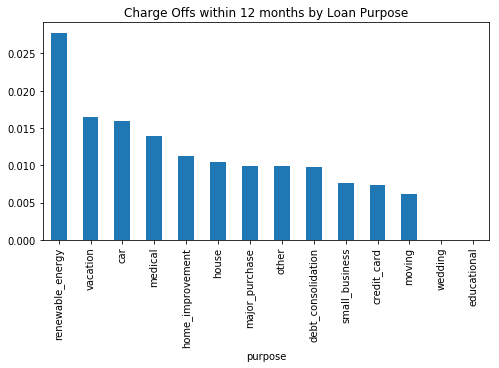

In [239]:
df.groupby("purpose")["chargeoff_within_12_mths"].mean().sort_values(ascending= False).plot(kind="bar", figsize=(8,4), 
                                           title = "Charge Offs within 12 months by Loan Purpose")
plt.show();
#we can see which types of borrowers are most irresponsible. 

In [130]:
df.purpose.unique()

array(['debt_consolidation', 'home_improvement', 'car', 'small_business',
       'house', 'credit_card', 'major_purchase', 'vacation', 'other',
       'moving', 'medical', 'renewable_energy', 'wedding', 'educational'], dtype=object)

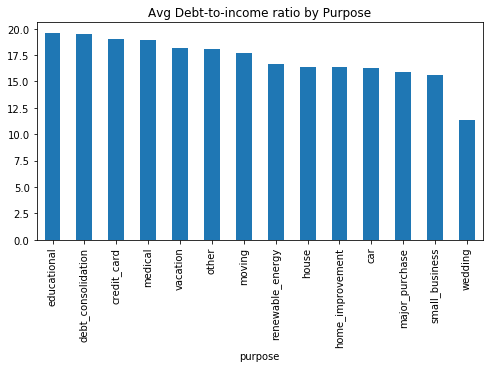

In [247]:
df.groupby("purpose")["dti"].mean().sort_values(ascending= False).plot(kind="bar", figsize=(8,4), 
                                           title = "Avg Debt-to-income ratio by Purpose")
plt.show();

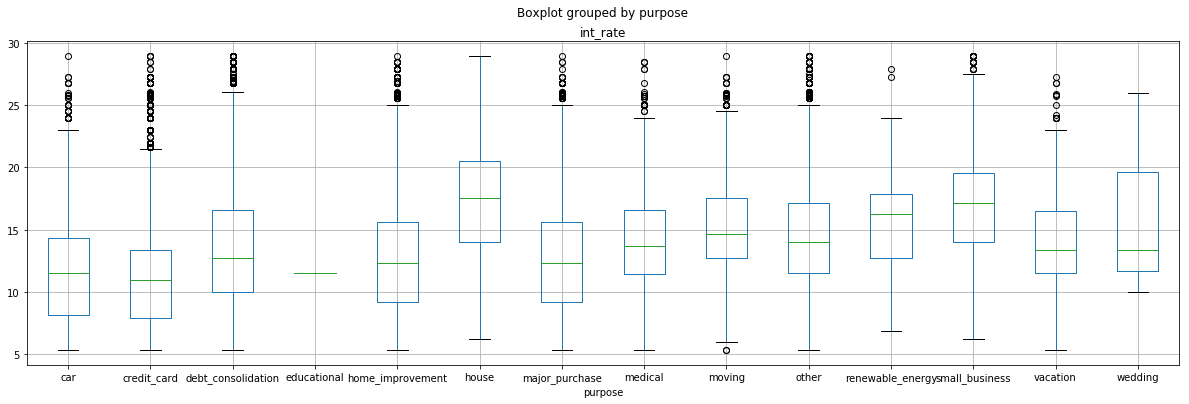

In [246]:
#boxplot
df.boxplot(column="int_rate", by="purpose", figsize=(20, 6))
plt.show();

In [ ]:
df["int_rate"] = df.int_rate.str.replace("%", "")
df["int_rate"] = df.int_rate.astype(float)

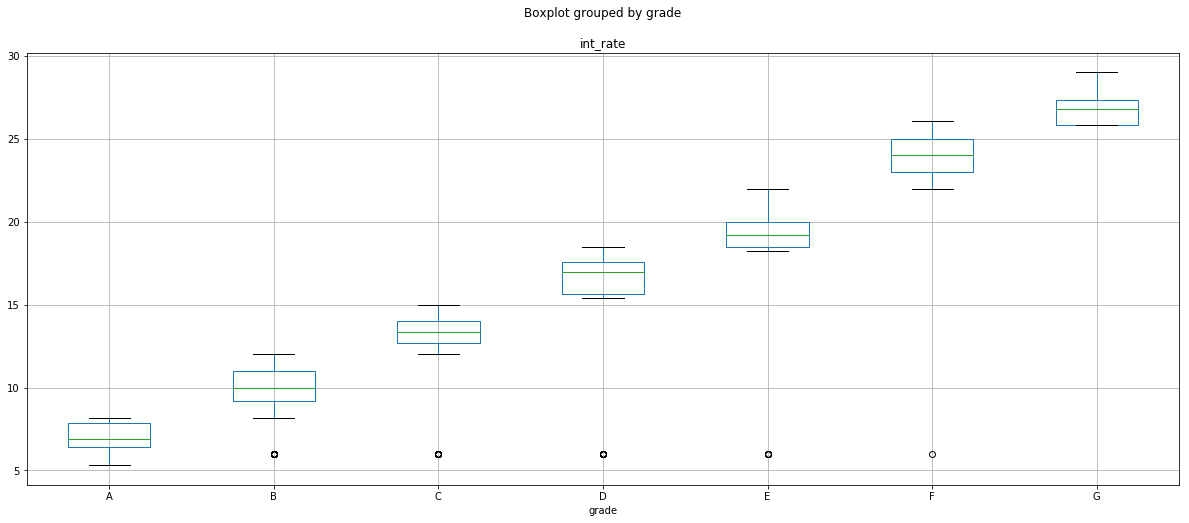

In [245]:
#boxplot
df.boxplot(column="int_rate", by="grade", figsize=(20, 8))
plt.show();

In [244]:
df.groupby("loan_status")["int_rate"].median().sort_values(ascending = False)

loan_status
1    14.65
0    11.99
Name: int_rate, dtype: float64

In [243]:
loan_status_mean = df.groupby("loan_status").mean()
loan_status_mean.to_csv('loan_status_mean.csv')

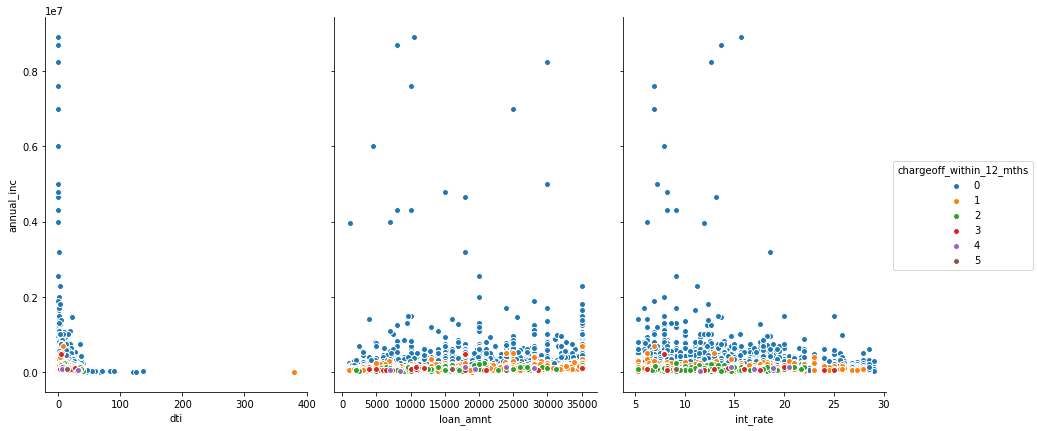

In [352]:
# scatter plot in Seaborn
sns.pairplot(data = df, x_vars=['dti','loan_amnt','int_rate'], 
             y_vars='annual_inc', size=6, hue = 'chargeoff_within_12_mths', aspect=0.7);

Let's take a look at the highest correlated features relative to loans later than one month in payments.

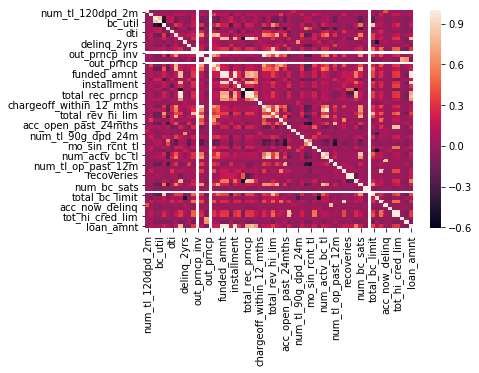

In [240]:
sns.heatmap(df.corr())
plt.figure(figsize=(20, 20));

# Now our dataset is ready for Feature Engineering

In [340]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [341]:
#Assign X and y
X = df.drop("loan_status", axis =1)
y = df.loan_status

In [329]:
#Make a train test split of the spotify data and train logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4,
                                                    random_state=123)

In [346]:
#Pass the predictions and y_test into a confusion matrix
lr = LogisticRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

cm = confusion_matrix(y_test, preds)
cm

array([[57211,     0],
       [   37, 20210]])

In [347]:
ps = precision_score(y_test, preds)
rs = recall_score(y_test, preds)

print ("The precision score is {:.2f} and the recall score is {:.2f}".format(ps*100, rs*100))

The precision score is 100.00 and the recall score is 99.82


In [350]:
score = lr.score(X, y)
print score*100

99.966433422


In [337]:
#Use cross_val_score method to generate the average accuracy score for 5 CVs

cross_val_score(LogisticRegression(), X, y, cv = 5, scoring="accuracy").mean()


0.99953523199669492

In [338]:
#Derive probabilities of class 1 from the test set
test_probs = lr.predict_proba(X_test)[:,1]
#Pass in the test_probs variable and the true test labels aka y_test in the roc_curve function
fpr, tpr, thres = roc_curve(y_test, test_probs)
#Outputs the fpr, tpr, for varying thresholds

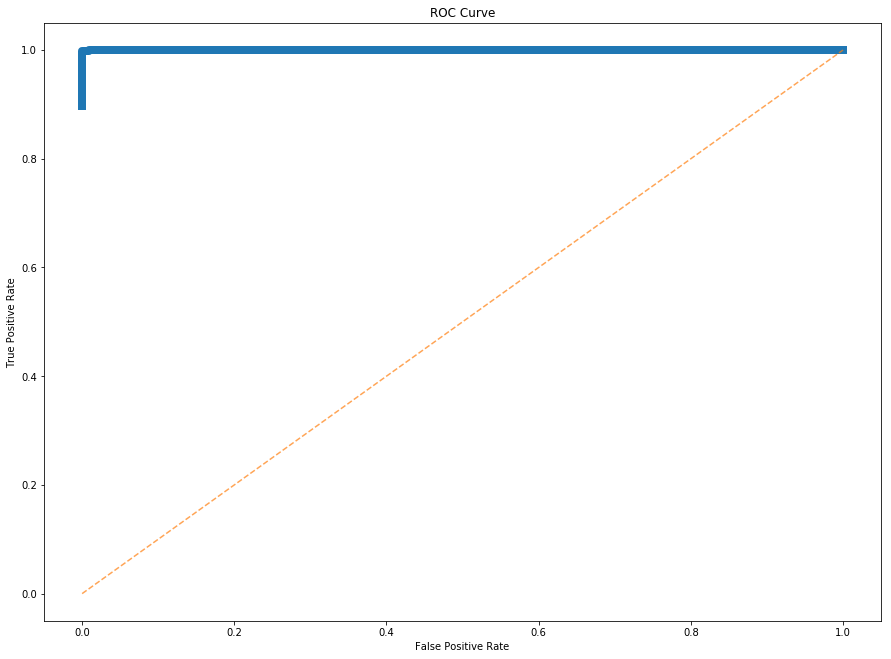

In [339]:
#Plotting False Positive Rates vs the True Positive Rates
#Dotted line represents a useless model
plt.figure(figsize=(15,11))
plt.plot(fpr, tpr, linewidth= 8)
#Line of randomness
plt.plot([0,1], [0,1], "--", alpha=.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [354]:
#Table of coefficients and their values
coef = pd.DataFrame(zip(X.columns, np.transpose(lr.coef_[0])), columns=["coef", "value"])
coef.to_csv('coef.csv')

In [358]:
coef_odds = np.e**(coef["value"])
coef["odds_ratio"] = coef_odds
coef

,coef,value,odds_ratio
0,num_tl_120dpd_2m,-8.703547e-09,1.000000
1,mo_sin_old_il_acct,-1.700981e-03,0.998300
2,percent_bc_gt_75,-6.836491e-04,0.999317
3,bc_util,-9.943625e-04,0.999006
4,bc_open_to_buy,-3.052751e-05,0.999969
5,mths_since_recent_bc,-5.645552e-04,0.999436
6,dti,-2.450151e-04,0.999755
7,num_rev_accts,-1.705835e-04,0.999829
8,total_pymnt,-2.175875e-03,0.997826
9,delinq_2yrs,-2.427748e-06,0.999998
